In [1]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils
import sys

In [3]:
from requests import put, get, post
import pickle as cPickle
import io

# Data deneration

In [4]:
data = utils.generate_sample(n_components=2, n_points=2000, random_seed=42)

# Data display

Component 0


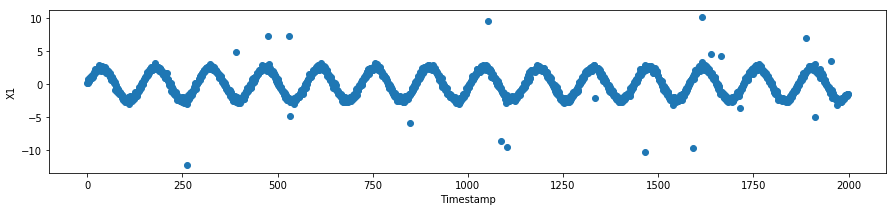

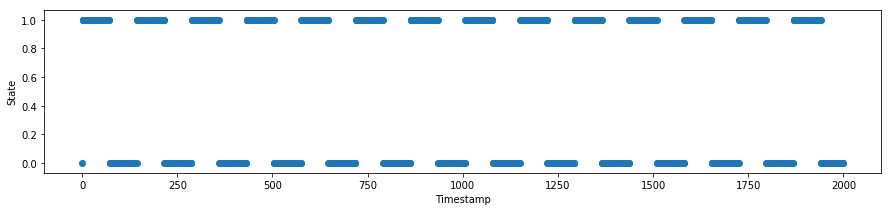

Component 1


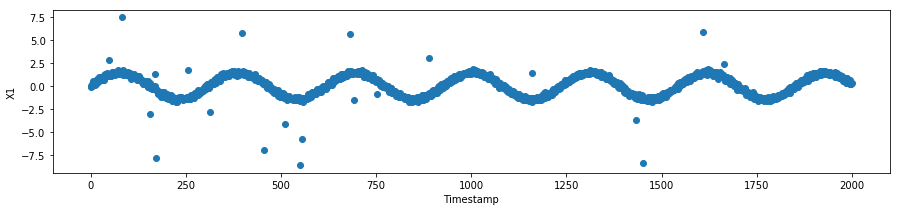

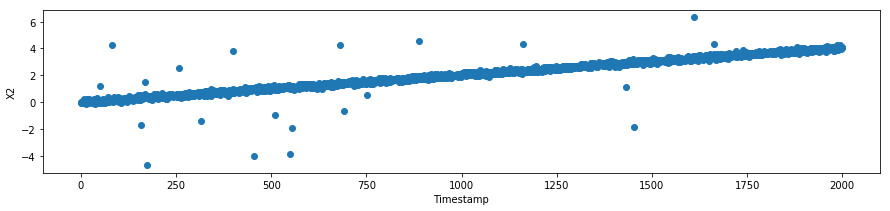

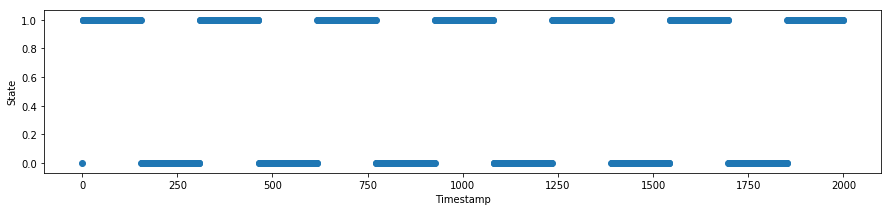

In [5]:
for acomp in data.keys():
    
    data_comp = data[acomp]
    print(acomp)
    
    columns = data_comp.columns[1:]
    for acol in columns:
        plt.figure(figsize=(15, 3))
        plt.scatter(data_comp['Timestamp'].values, data_comp[acol].values)
        plt.xlabel('Timestamp')
        plt.ylabel(acol)
        plt.show()

# Service howto

In [6]:
service_ip= 'http://0.0.0.0:5000'

### /

This is page with helping info.

In [7]:
r = get(service_ip+'/')
print(r.text)

Welcome to Nostradamus service! You have a bright future :) 
    
    Usage:
      /                             : it is this page with helping information.
      /<model_name>/fit             : create and fit a new model for failures diagnostics or 
                                      prediction using historical data.
      /<model_name>/predict         : get failure prediction using a trained model.
      /<model_name>/upload          : upload a trained model as cPickle-object.
      /<model_name>/download        : download a cPickle-object of a trained model.
      /models_list                  : get list of all available models on the server.
    


### /model_name/fit

This request if for creating and traning a new model with historical data.

In [8]:
# Prepare data for traning
serialized_data = cPickle.dumps(data, protocol=cPickle.HIGHEST_PROTOCOL)
files = {'data':io.BytesIO(serialized_data)}

# Prepare model's parameters for traning
params="{'window_size': 10, 'slice_size': 10, 'prediction_horizont': 0, 'method': 'RandomForest', 'timestamp_column': 'Timestamp', 'state_column': 'State'}"
params2send = {'params':params}

# Send request
r = post(service_ip+'/model_1/fit', files=files, data=params2send)
r.content

b'Model model_1 was successfully created and trained.'

### /model_name/predict
Use the trained model for prediction on online data.

In [9]:
# Prepare data for prediction
serialized_data = cPickle.dumps(data, protocol=cPickle.HIGHEST_PROTOCOL)
files = {'data':io.BytesIO(serialized_data)}

# Send request
r = post(service_ip+'/model_1/predict', files=files)

# Get predictions
output = cPickle.load(io.BytesIO(r.content))

In [10]:
output['Component 0'].head()

0      1  Timestamp
0  0.998  0.002       99.0
1  0.998  0.002      109.0
2  0.999  0.001      119.0
3  0.998  0.002      129.0
4  0.984  0.016      139.0

### /model_name/download

Download a cPickle-object of a trained model.

In [11]:
# Send request
r = get(service_ip+'/model_1/download')

# Get model
model = cPickle.load(io.BytesIO(r.content))

# Or save the model into a file
with open('model.pkl', 'wb') as f:
    f.write(r.content)

Using Theano backend.


### /model_name/upload

Upload a trained model.

In [12]:
# Prepare model
files = {'data':open('model.pkl', 'rb')}

# Send request
r = post(service_ip+'/model_2/upload', files=files)
print(r.text)

Model model_2 was successfully uploaded


### /models_list

Get list of all models.

In [13]:
r = get(service_ip+'/models_list')
print(r.text)

Available models: model_1, model_2.
